<a href="https://colab.research.google.com/github/SuminBae97/PytorchStudy/blob/main/gluon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mxnet


In [ ]:
pip install --upgrade mxnet~=1.7 gluonts

In [10]:
import mxnet as mx
from mxnet import nd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from time import time
from IPython import display
import math, random
from mxnet import autograd


In [11]:

x = nd.arange(-7,7,0.01)

In [12]:
#mean, var
parameters = [(0,1),(0,2),(3,1)]


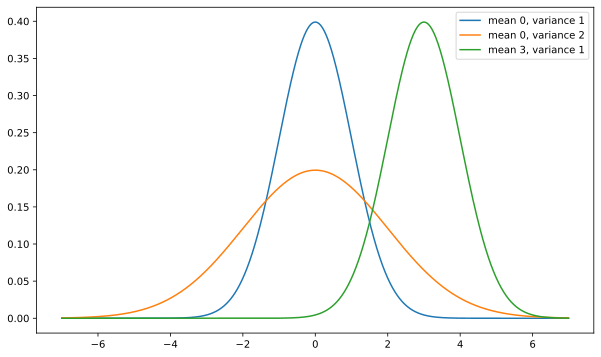

In [13]:
display.set_matplotlib_formats('svg')
plt.figure(figsize=(10, 6))
for (mu, sigma) in parameters:
    p = (1/math.sqrt(2 * math.pi * sigma**2)) * nd.exp(-(0.5/sigma**2) * (x-mu)**2)
    plt.plot(x.asnumpy(), p.asnumpy(), label='mean ' + str(mu) + ', variance ' + str(sigma))

plt.legend()
plt.show()

Linear Regression

In [14]:
num_inputs=2
num_examples=1000

true_w = nd.array([2,-3.4])
true_b = 4.2

features = nd.random.normal(scale=1, shape=(num_examples,num_inputs))


In [15]:
labels = nd.dot(features,true_w) + true_b

In [16]:
labels +=nd.random.normal(scale=0.01,shape=labels.shape)


In [17]:
features[0] , labels[0]

(
 [2.2122064 0.7740038]
 <NDArray 2 @cpu(0)>, 
 [6.000587]
 <NDArray 1 @cpu(0)>)

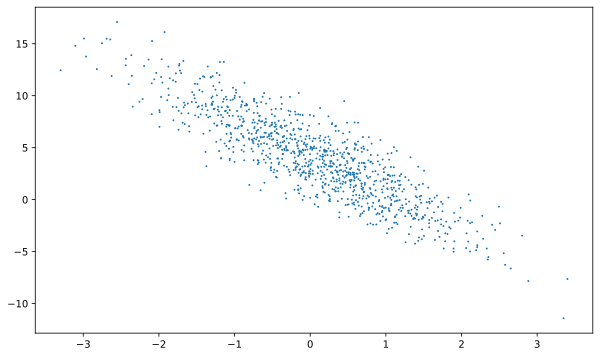

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(features[:,1].asnumpy(),labels.asnumpy(),1)

In [19]:
def data_iter(batch_size,features,labels):
    #total number of data
    num_examples = len(features)
    
    indices = list(range(num_examples))
    random.shuffle(indices)

    for i in range(0,num_examples,batch_size):
        j = nd.array(indices[i:min(i+batch_size,num_examples)])
        yield features.take(j), labels.take(j)



In [20]:
batch_size=10
for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break


[[-0.662727    1.8137852 ]
 [ 0.95977837  1.1124251 ]
 [-0.6845048  -0.10388865]
 [-1.8043553   0.87395597]
 [-0.8594276  -0.13214685]
 [ 0.27739874 -1.1159512 ]
 [ 0.6538188   1.1236147 ]
 [ 0.5591865  -1.8126351 ]
 [-1.2712238  -1.9902322 ]
 [ 0.09146718 -0.60423905]]
<NDArray 10x2 @cpu(0)> 
[-3.2972414  2.3256133  3.1818058 -2.3879097  2.9326987  8.549477
  1.6822191 11.479114   8.41412    6.4342337]
<NDArray 10 @cpu(0)>


Modeling

In [21]:
w = nd.random.normal(scale=0.01,shape=(num_inputs,1))
b = nd.zeros(shape=(1,))


In [22]:
w.attach_grad()
b.attach_grad()


In [23]:
def linreg(X,w,b):
    return nd.dot(X,w)+b

In [24]:
def squared_loss(y_hat,y):
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [25]:
def sgd(params,lr,batch_size):
    for param in params:
        param[:] = param - lr*param.grad/batch_size

In [26]:
lr=0.03
num_epochs=10
net=linreg
loss = squared_loss






In [27]:
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        with autograd.record():
            l = loss(net(X,w,b),y)
        l.backward()
        sgd([w,b],lr,batch_size)
    train_l = loss(net(features,w,b),labels)
    print('epoch %d, loss %f'%(epoch+1,train_l.mean().asnumpy()))

epoch 1, loss 0.040287
epoch 2, loss 0.000159
epoch 3, loss 0.000051
epoch 4, loss 0.000050
epoch 5, loss 0.000050
epoch 6, loss 0.000050
epoch 7, loss 0.000050
epoch 8, loss 0.000050
epoch 9, loss 0.000050
epoch 10, loss 0.000050
